<a href="https://colab.research.google.com/github/cdrowley/pandas-feature-engineering/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats
from statsmodels.graphics.gofplots import qqplot

url = 'https://raw.githubusercontent.com/allaccountstaken/ML_algorithms/main/data/titanic.csv'
df = pd.read_csv(url)
df.head(2)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [2]:
df.shape

(891, 12)

In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df['Survived'].value_counts() # semi-imbalanced target class # easiest adjustment is down-sampling but lots of methods here

0    549
1    342
Name: Survived, dtype: int64

In [5]:
cat_cols = ['PassengerId', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
df = df.drop(cat_cols, axis='columns')

## Explore Continous Features

In [6]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [8]:
# Look at fare by different passenger class levels
df.groupby('Pclass')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,216.0,84.154687,78.380373,0.0,30.92395,60.2875,93.5,512.3292
2,184.0,20.662183,13.417399,0.0,13.00000,14.2500,26.0,73.5000
3,491.0,13.675550,11.778142,0.0,7.75000,8.0500,15.5,69.5500


In [9]:
def describe_cont_feature(df, target, feature):
    print(f'\n*** Results for {feature}')
    print(df.groupby(target)[feature].describe())
    ttest(target, feature)

def ttest(target, feature): # is the difference between groups s significant
    survived = df[df[target]==1][feature]
    not_survived = df[df[target]==0][feature]
    tstat, pval = scipy.stats.ttest_ind(survived, not_survived, equal_var=False)
    print('t-statistic: {:.1f}, p-value: {:.3} \n'.format(tstat, pval))

for feature in ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']:
    describe_cont_feature(df, 'Survived', feature)


*** Results for Pclass
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  2.531876  0.735805  1.0  2.0  3.0  3.0  3.0
1         342.0  1.950292  0.863321  1.0  1.0  2.0  3.0  3.0
t-statistic: -10.3, p-value: 2.91e-23 


*** Results for Age
          count       mean        std   min   25%   50%   75%   max
Survived                                                           
0         424.0  30.626179  14.172110  1.00  21.0  28.0  39.0  74.0
1         290.0  28.343690  14.950952  0.42  19.0  28.0  36.0  80.0
t-statistic: nan, p-value: nan 


*** Results for SibSp
          count      mean       std  min  25%  50%  75%  max
Survived                                                    
0         549.0  0.553734  1.288399  0.0  0.0  0.0  1.0  8.0
1         342.0  0.473684  0.708688  0.0  0.0  0.0  1.0  4.0
t-statistic: -1.2, p-value: 0.233 


*** Results for Parch
          count      mean       std  min

In [10]:
df.groupby(df['Age'].isnull()).mean() # True means age is missing / was not recorded

,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,
False,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


## Plot Continous Features

In [11]:
df = pd.read_csv(url, usecols=['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'])
target = 'Survived'

df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833


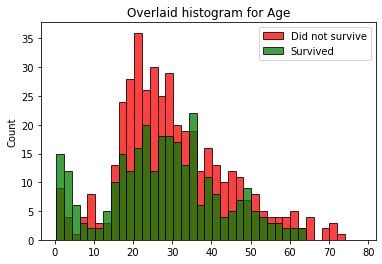

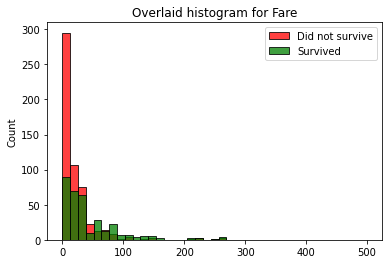

In [12]:
# Plot overlaid histograms for continous features
features = ['Age', 'Fare']

for f in features:
    died = list(df[df[target] == 0][f].dropna())
    survived = list(df[df[target] == 1][f].dropna())

    # https://numpy.org/doc/stable/reference/generated/numpy.histogram_bin_edges.html#numpy.histogram_bin_edges
    xmin = min(min(died), min(survived))
    xmax = max(max(died), max(survived))
    width = (xmax - xmin) / 40

    fig, ax = plt.subplots()
    sns.histplot(died, color='r', kde=False, bins=np.arange(xmin, xmax, width),  ax=ax) 
    sns.histplot(survived, color='g', kde=False, bins=np.arange(xmin, xmax, width), ax=ax)
    plt.legend(['Did not survive', 'Survived'])
    plt.title('Overlaid histogram for {}'.format(f))
    plt.show()

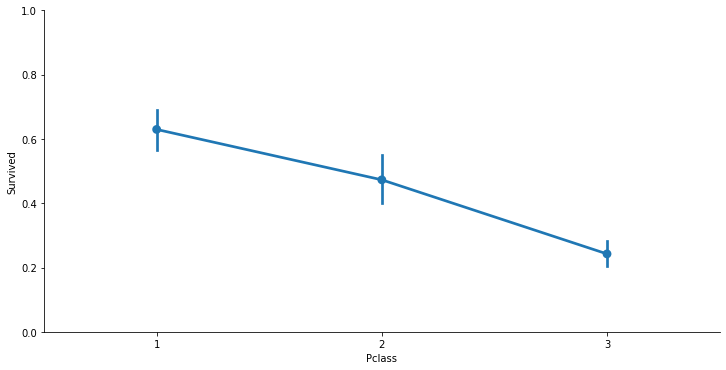

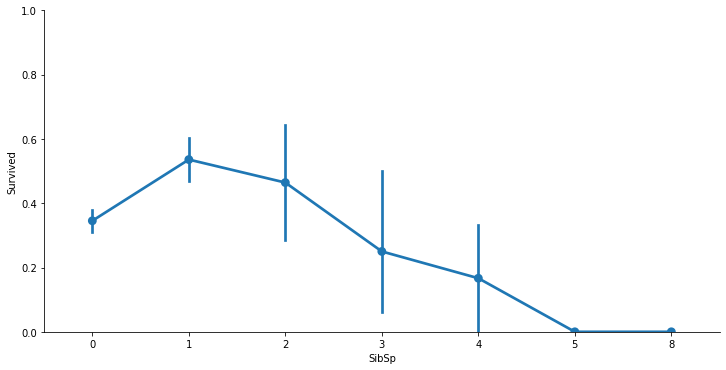

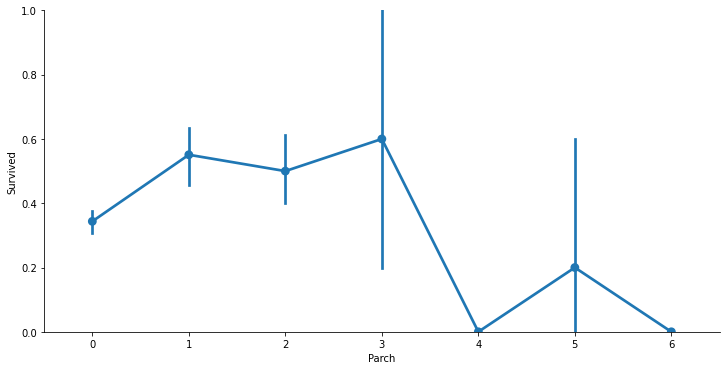

In [13]:
# Generate categorical plots for categorical features
features = ['Pclass', 'SibSp', 'Parch']

for f in features:
    sns.catplot(x=f, y=target, data=df, kind='point', aspect=2, ) 
    plt.ylim(0, 1)
    plt.show()

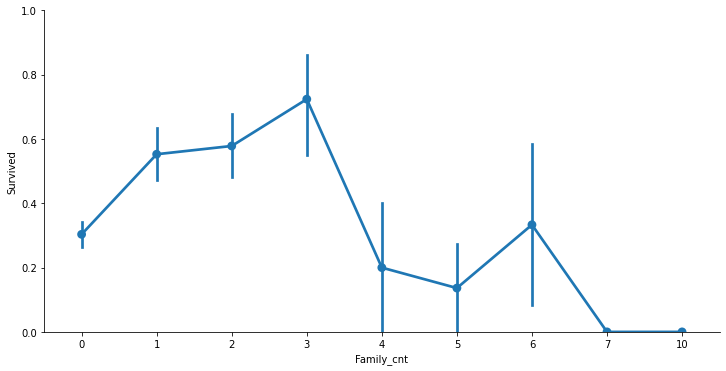

In [14]:
# Create a new family count feature
df['Family_cnt'] = df['SibSp'] + df['Parch']
sns.catplot(x='Family_cnt', y=target, data=df, kind='point', aspect=2, ) 
plt.ylim(0, 1)
plt.show()

## Explore Categorical Features

In [15]:
df = pd.read_csv(url)
df = df.drop(['PassengerId', 'Pclass', 'Age', 'SibSp','Parch', 'Fare'], axis='columns')
target = 'Survived'

df.head(2)

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C


In [16]:
df.isnull().sum()

Survived      0
Name          0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [17]:
for col in df.columns:
    print(f"{col}:  {df[col].nunique()} unique values")

Survived:  2 unique values
Name:  891 unique values
Sex:  2 unique values
Ticket:  681 unique values
Cabin:  147 unique values
Embarked:  3 unique values


In [18]:
# Check survival rate by gender
df.groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


In [19]:
# Check survival rate by the port departed from
df.groupby('Embarked').mean()

,Survived
Embarked,
C,0.553571
Q,0.389610
S,0.336957


In [20]:
# Is Cabin missing at random?
df.groupby(df['Cabin'].isnull()).mean() # tells us what % of passengers in each group survived

,Survived
Cabin,
False,0.666667
True,0.299854


In [21]:
# Look at unique values for the Ticket feature
df['Ticket'].value_counts() # likely assigned at random

347082        7
1601          7
CA. 2343      7
CA 2144       6
3101295       6
             ..
A.5. 18509    1
315089        1
17764         1
347068        1
345783        1
Name: Ticket, Length: 681, dtype: int64

In [22]:
# Create a title feature by parsing passenger name
df['Title'] = df['Name'].apply(lambda x: x.split(', ')[1].split('.')[0].strip())

In [23]:
# Look at survival rate by title
df.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])
# df.groupby(['Title', 'Sex'])[['Survived']].agg(['count', 'mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

## Plot Continous Features

In [24]:
# Create a title feature by parsing passenger name and create a cabin indicator variable
df['Title_Raw'] = df['Name'].apply(lambda x: x.split(', ')[1].split('.')[0].strip())
df['Title'] = df['Title_Raw'].apply(lambda x: x if x in df['Title_Raw'].value_counts().nlargest(4) else 'Other')
df['Cabin_ind'] = np.where(df['Cabin'].isnull(), 0, 1)
df.head(3)

,Survived,Name,Sex,Ticket,Cabin,Embarked,Title,Title_Raw,Cabin_ind
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S,Mr,Mr,0
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C,Mrs,Mrs,1
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S,Miss,Miss,0


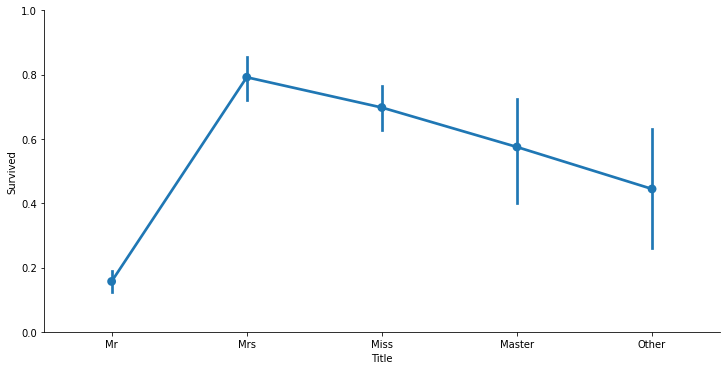

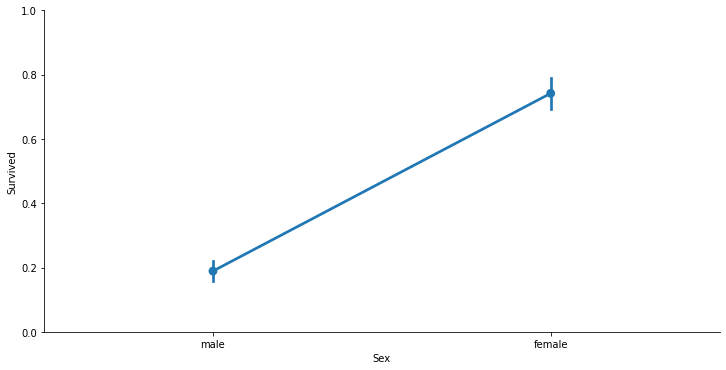

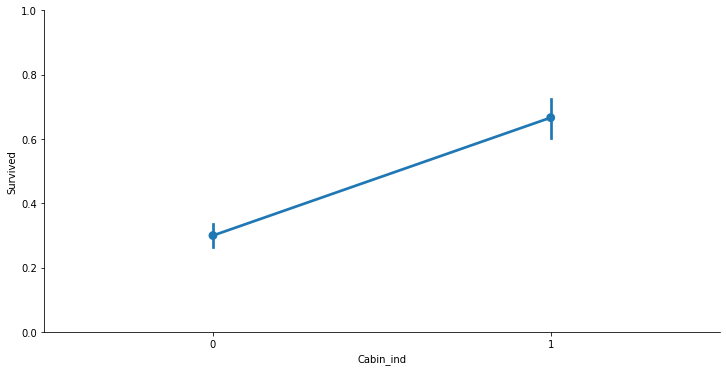

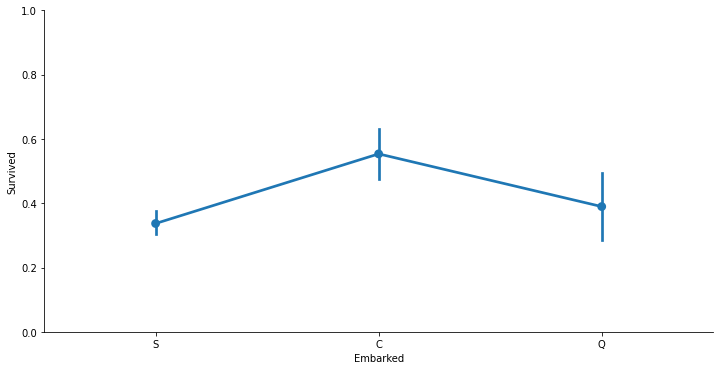

In [25]:
features = ['Title', 'Sex', 'Cabin_ind', 'Embarked']
for f in features:
    sns.catplot(x=f, y=target, data=df, kind='point', aspect=2, ) # each point indicates the survival rate for everybody in that group, the vertical bar shows the error bar
    plt.ylim(0, 1)

In [26]:
# Split embarked by wheter the passenger had a cabin
df.pivot_table('Survived', index='Cabin_ind', columns='Embarked', aggfunc='count')
#df.groupby(['Cabin_ind'])[['Survived']].agg(['count'])

Embarked,C,Q,S
Cabin_ind,,,
0,99,73,515
1,69,4,129


### Summary

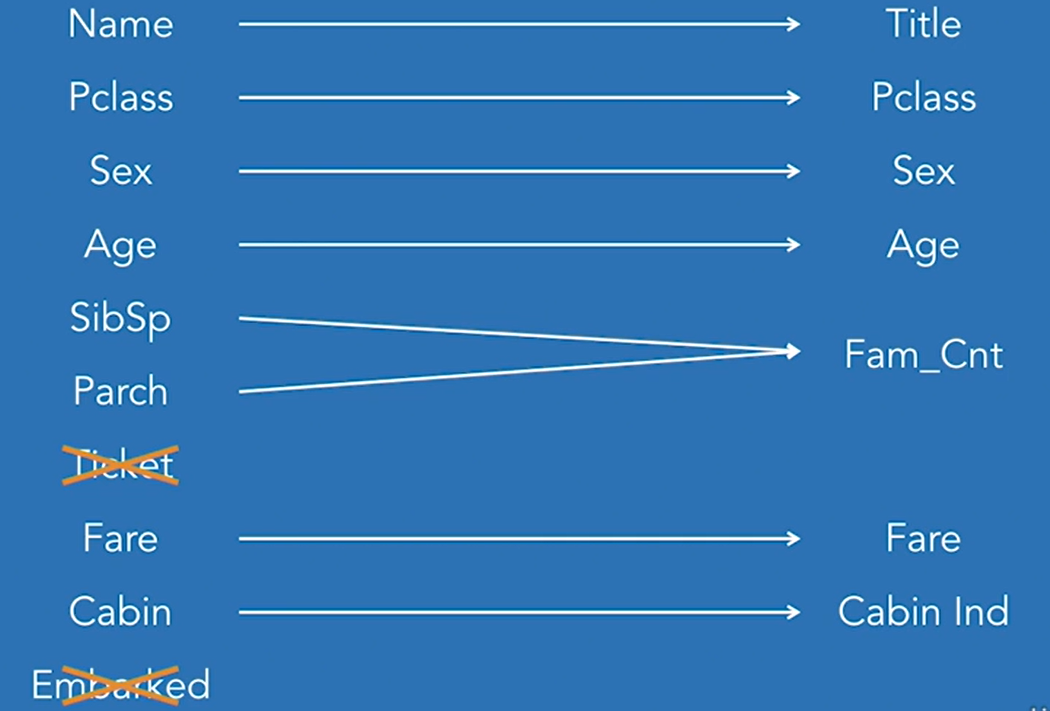

## Creating and Cleaning Features: Treat Missing Values in The Data



1.   Impute to the median or mean
2.   Model that feature to preduct the missing values
3.   Assign it some default value (Other or -999)



In [27]:
df = pd.read_csv(url)

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
# Fill missing Ages
df.groupby(df['Age'].isnull()).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,448.582633,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
True,435.581921,0.293785,2.598870,NaN,0.564972,0.180791,22.158567


In [29]:
df['Age_clean'] = df['Age'].fillna(df['Age'].mean())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_clean        0
dtype: int64

In [30]:
# Fill missing Embarked
df['Embarked_clean'] = df['Embarked'].fillna('O')
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age               177
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_clean           0
Embarked_clean      0
dtype: int64

*   Remove Outliers (just in one dimension)

In [31]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.699118
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,13.002015
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,80.000000


In [32]:
def detect_outlier(df, feature):
    outliers = []
    data = df[feature]
    mean = np.mean(data)
    std = np.std(data)

    for y in data:
        z_score = (y - mean) / std
        if np.abs(z_score) > 3:
            outliers.append(y)
    
    print(f'\nOutlier caps for {feature}')

    print('    --95 percentile {:.1f} / {} values exceed that'.format(data.quantile(.95), len([i for i in data if i > data.quantile(.95)])))
    print('    --3sd percentile {:.1f} / {} values exceed that'.format(mean + 3*(std), len(outliers)))
    print('    --99 percentile {:.1f} / {} values exceed that'.format(data.quantile(.99), len([i for i in data if i > data.quantile(.99)])))

features = ['Age_clean', 'SibSp', 'Parch', 'Fare']
for f in features:
    detect_outlier(df, f)


Outlier caps for Age_clean
    --95 percentile 54.0 / 42 values exceed that
    --3sd percentile 68.7 / 7 values exceed that
    --99 percentile 65.0 / 8 values exceed that

Outlier caps for SibSp
    --95 percentile 3.0 / 30 values exceed that
    --3sd percentile 3.8 / 30 values exceed that
    --99 percentile 5.0 / 7 values exceed that

Outlier caps for Parch
    --95 percentile 2.0 / 15 values exceed that
    --3sd percentile 2.8 / 15 values exceed that
    --99 percentile 4.0 / 6 values exceed that

Outlier caps for Fare
    --95 percentile 112.1 / 45 values exceed that
    --3sd percentile 181.2 / 20 values exceed that
    --99 percentile 249.0 / 9 values exceed that


In [33]:
# Cap features
df['Age_clean'].clip(upper=df['Age_clean'].quantile(.99), inplace=True)
df['Fare_clean'] = df['Fare'].clip(upper=df['Fare'].quantile(.99))

In [34]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_clean,Fare_clean
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,29.640195,31.224767
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,12.820616,42.524125
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.420000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,22.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,29.699118,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,35.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,65.000000,249.006220


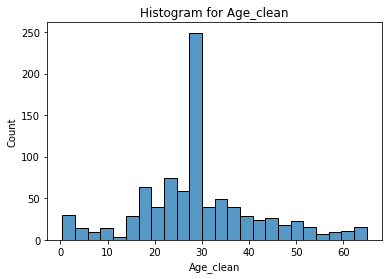

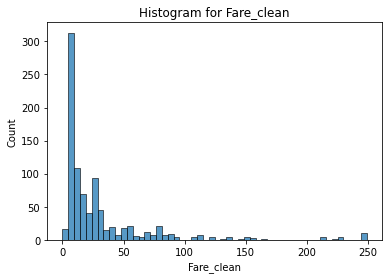

In [35]:
features = ['Age_clean', 'Fare_clean']

for f in features:
    sns.histplot(df[f], kde=False)
    plt.title(f'Histogram for {f}')
    plt.show()

*   Box-Cox Power Transformation

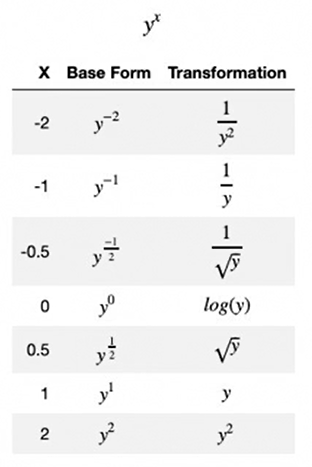

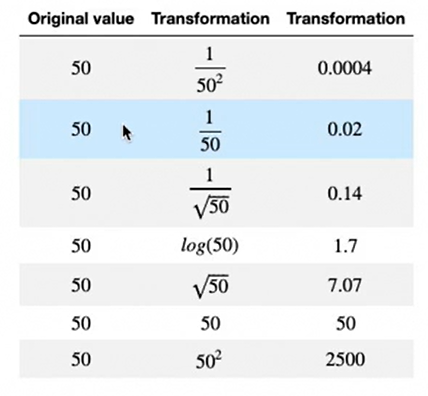

**Process**



1.   Determine what range of exponents to test
2.   Apply each transformation to each value of your chosen feature
3.   Use some criteria to determine which of the transformations yield the best distribution



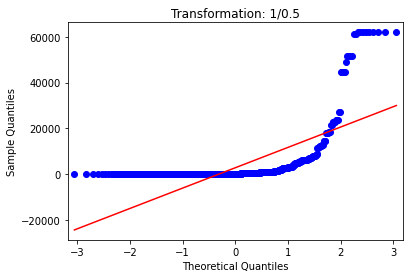

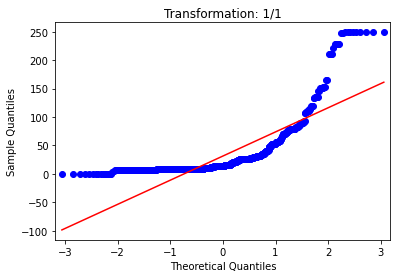

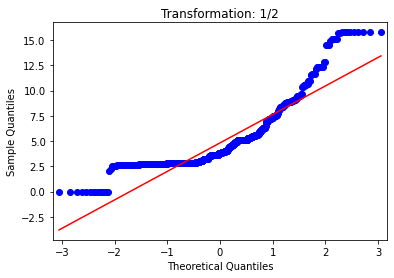

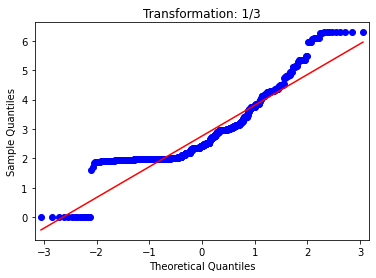

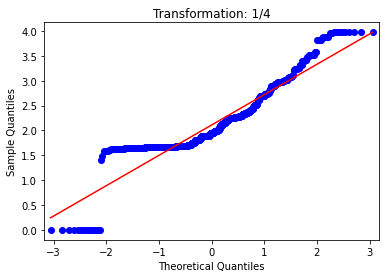

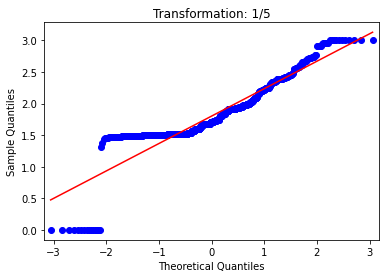

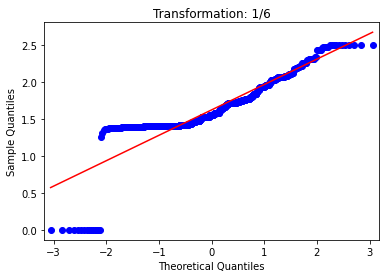

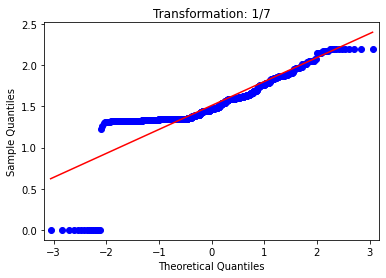

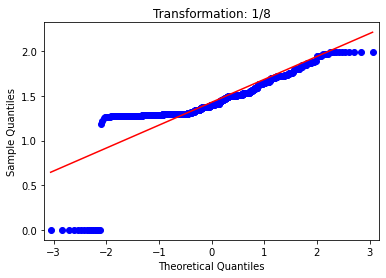

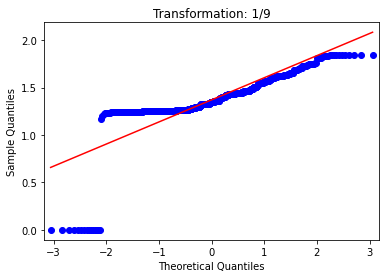

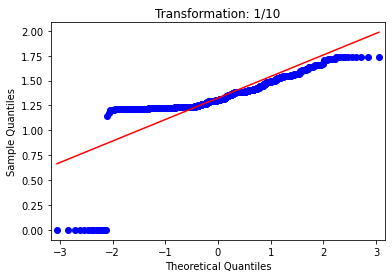

In [36]:
for i in [0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    data_t = df['Fare_clean']**(1/i)
    qqplot(data_t, line='s')
    plt.title(f"Transformation: 1/{i}")

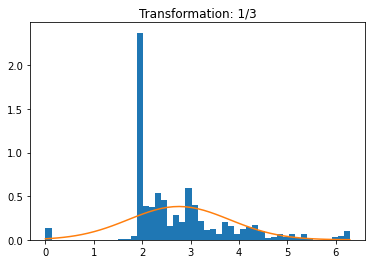

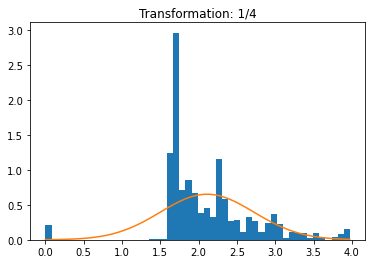

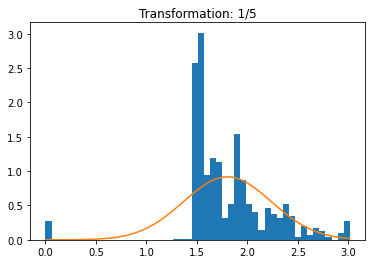

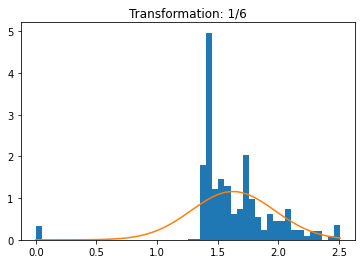

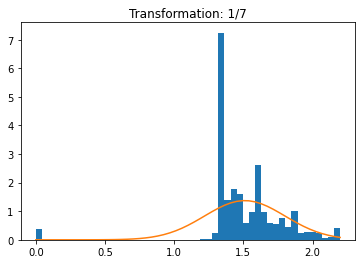

In [37]:
# from the above the following range looks reasonable
for i in [3, 4, 5, 6, 7]:
    data_t = df['Fare_clean']**(1/i)
    n, bins, patches = plt.hist(data_t, 50, density=True)

    # compare histogram to normal curve of the data (we want the histogram to approximate the normal curve)
    mu = np.mean(data_t)
    sigma = np.std(data_t)
    plt.plot(bins, scipy.stats.norm.pdf(bins, mu, sigma))

    plt.title(f"Transformation: 1/{i}")
    plt.show()

In [38]:
# Create new transformed feature
df['Fare_clean_transformed'] = df['Fare_clean'].apply(lambda x: x**(1/5))
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_transformed
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457


In [39]:
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_transformed,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs


In [40]:
df.pivot_table('Survived', index=['Title', 'Sex'], aggfunc=['count', 'mean'])

count      mean
                    Survived  Survived
Title        Sex                      
Capt         male          1  0.000000
Col          male          2  0.500000
Don          male          1  0.000000
Dr           female        1  1.000000
             male          6  0.333333
Jonkheer     male          1  0.000000
Lady         female        1  1.000000
Major        male          2  0.500000
Master       male         40  0.575000
Miss         female      182  0.697802
Mlle         female        2  1.000000
Mme          female        1  1.000000
Mr           male        517  0.156673
Mrs          female      125  0.792000
Ms           female        1  1.000000
Rev          male          6  0.000000
Sir          male          1  1.000000
the Countess female        1  1.000000

## Binary Indicator variable

In [41]:
df.groupby(df['Cabin'].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [42]:
df['Cabin_ind'] = np.where(df['Cabin'].isnull(), 0, 1)
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_transformed,Title,Cabin_ind
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0,S,7.2500,1.486167,Mr,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0,C,71.2833,2.347457,Mrs,1


## Combine SibSp & Parch into Family_cnt

In [43]:
df['Family_cnt'] = df['SibSp'] + df['Parch']

## Convert categorical features to numeric

In [44]:
from sklearn.preprocessing import LabelEncoder

features = ['Sex', 'Cabin', 'Embarked', 'Embarked_clean', 'Title']

for f in features:
    le = LabelEncoder()
    df[f] = le.fit_transform(df[f].astype(str))

In [45]:
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_transformed,Title,Cabin_ind,Family_cnt
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,147,2,22.0,3,7.2500,1.486167,11,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,81,0,38.0,0,71.2833,2.347457,12,1,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,147,2,26.0,3,7.9250,1.512864,8,0,0


# Prepare features for Modelling: Create Training and Test Sets

In [46]:
from sklearn.model_selection import train_test_split

features = df.drop(['PassengerId', 'Ticket', 'Name', 'Survived'], axis='columns')
labels = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=8888) # train & test\validation set
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42) # test & validation set

X_train.head(3)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_clean,Embarked_clean,Fare_clean,Fare_clean_transformed,Title,Cabin_ind,Family_cnt
624,3,1,21.0,0,0,16.1000,147,2,21.0,3,16.1000,1.743272,11,0,0
858,3,0,24.0,0,3,19.2583,147,0,24.0,0,19.2583,1.806856,12,0,3
242,2,1,29.0,0,0,10.5000,147,2,29.0,3,10.5000,1.600434,11,0,0


In [47]:
# Double check:
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


## Prepare Features for Modeling: Standardize All Features (don't need it for random forest but for future ref)

In [48]:
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler() # computes the mean and std and scales
# scaler.fit(X_train)

# features = X_train.columns

# X_train[features] = scaler.transform(X_train[features])
# X_test[features] = scaler.transform(X_test[features])
# X_val[features] = scaler.transform(X_val[features])

In [49]:
# X_train.head(3)

# Write out three final datasets

In [50]:
# Define list of features to be used for each dataset

raw_original_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']

cleaned_original_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare_clean', 'Cabin', 'Embarked_clean']

all_features = ['Pclass', 'Sex', 'Age_clean', 'SibSp', 'Parch', 'Fare_clean', 'Fare_clean_transformed', 'Cabin', 
                'Cabin_ind', 'Embarked_clean', 'Title', 'Family_cnt']

reduced_features = ['Pclass', 'Sex', 'Age_clean', 'Family_cnt', 'Fare_clean_transformed', 'Cabin_ind', 'Title']

In [51]:
import pathlib


pathlib.Path('data').mkdir(parents=True, exist_ok=True) 

X_train[raw_original_features].to_csv('data/train_features_raw.csv', index=False)
X_test[raw_original_features].to_csv('data/test_features_raw.csv', index=False)
X_val[raw_original_features].to_csv('data/val_features_raw.csv', index=False)

X_train[cleaned_original_features].to_csv('data/train_features_clean.csv', index=False)
X_test[cleaned_original_features].to_csv('data/test_features_clean.csv', index=False)
X_val[cleaned_original_features].to_csv('data/val_features_clean.csv', index=False)

X_train[all_features].to_csv('data/train_features_all.csv', index=False)
X_test[all_features].to_csv('data/test_features_all.csv', index=False)
X_val[all_features].to_csv('data/val_features_all.csv', index=False)

X_train[reduced_features].to_csv('data/train_features_reduced.csv', index=False)
X_test[reduced_features].to_csv('data/test_features_reduced.csv', index=False)
X_val[reduced_features].to_csv('data/val_features_reduced.csv', index=False)

In [52]:
y_train.to_csv('data/train_labels.csv', index=False)
y_test.to_csv('data/test_labels.csv', index=False)
y_val.to_csv('data/val_labels.csv', index=False)

# Model to compare value of FE

In [53]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV # just a wrapper over cross validation

# run cells for each of: 
# [train_features_raw, train_features_clean, train_features_all, train_features_reduced]
train_features = pd.read_csv('data/train_features_reduced.csv')
model_outfile = 'models/mdl_reduced.pkl'


train_labels = pd.read_csv('data/train_labels.csv')

train_features.head(2)

,Pclass,Sex,Age_clean,Family_cnt,Fare_clean_transformed,Cabin_ind,Title
0,3,1,21.0,0,1.743272,0,11
1,3,0,24.0,3,1.806856,0,12


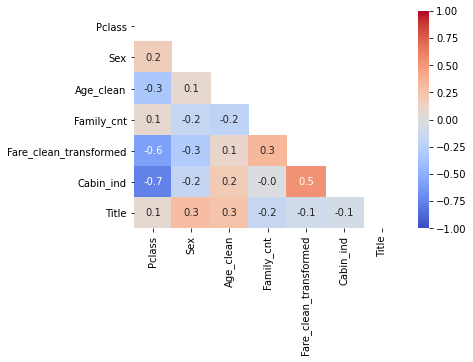

In [54]:
# Generate correlation matrix heat map
matrix = np.triu(train_features.corr())
sns.heatmap(train_features.corr(), annot=True, fmt='.1f', vmin=-1, vmax=1, center=0, cmap='coolwarm', mask=matrix);

# GridSearch CV

In [55]:
def print_results(results):
    print(f'BEST PARAMS: {results.best_params_}\n')

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [56]:
rf = RandomForestClassifier()
parameters = { # defaults are n_estimators=100, max_depth=None
    'n_estimators': [2**i for i in range(3, 10)], 
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(train_features, train_labels.values.ravel()) # pd to suitable flattened array

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 128}

0.766 (+/-0.04) for {'max_depth': 2, 'n_estimators': 8}
0.792 (+/-0.11) for {'max_depth': 2, 'n_estimators': 16}
0.783 (+/-0.046) for {'max_depth': 2, 'n_estimators': 32}
0.805 (+/-0.068) for {'max_depth': 2, 'n_estimators': 64}
0.796 (+/-0.071) for {'max_depth': 2, 'n_estimators': 128}
0.796 (+/-0.069) for {'max_depth': 2, 'n_estimators': 256}
0.796 (+/-0.067) for {'max_depth': 2, 'n_estimators': 512}
0.813 (+/-0.062) for {'max_depth': 4, 'n_estimators': 8}
0.826 (+/-0.097) for {'max_depth': 4, 'n_estimators': 16}
0.831 (+/-0.082) for {'max_depth': 4, 'n_estimators': 32}
0.82 (+/-0.066) for {'max_depth': 4, 'n_estimators': 64}
0.829 (+/-0.075) for {'max_depth': 4, 'n_estimators': 128}
0.829 (+/-0.072) for {'max_depth': 4, 'n_estimators': 256}
0.829 (+/-0.075) for {'max_depth': 4, 'n_estimators': 512}
0.813 (+/-0.074) for {'max_depth': 8, 'n_estimators': 8}
0.809 (+/-0.065) for {'max_depth': 8, 'n_estimators': 16}
0.813 (+/-0.05) for 

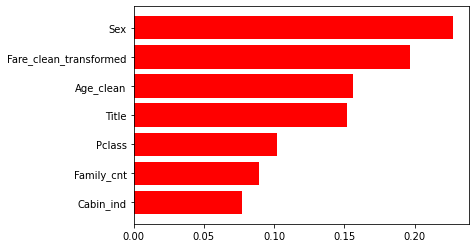

In [57]:
# Generate feature importance plot
feat_imp = cv.best_estimator_.feature_importances_
indices = np.argsort(feat_imp)

plt.yticks(range(len(indices)), [train_features.columns[i] for i in indices])
plt.barh(range(len(indices)), feat_imp[indices], color='r', align='center')
plt.show()

Write out Pickled Model

In [58]:
pathlib.Path('models').mkdir(parents=True, exist_ok=True) 

joblib.dump(cv.best_estimator_, model_outfile)

['models/mdl_reduced.pkl']

## Compare and Evaluate all models

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features_raw = pd.read_csv('data/val_features_raw.csv')
val_features_clean = pd.read_csv('data/val_features_clean.csv')
val_features_all = pd.read_csv('data/val_features_all.csv')
val_features_reduced = pd.read_csv('data/val_features_reduced.csv')

val_labels = pd.read_csv('data/val_labels.csv')
val_features_raw.head()

,Pclass,Sex,Age_clean,SibSp,Parch,Fare,Cabin,Embarked
0,1,1,36.000000,0,0,26.3875,121,2
1,2,0,29.699118,0,0,33.0000,147,2
2,3,1,29.699118,0,0,8.0500,147,2
3,3,0,25.000000,1,0,7.9250,147,2
4,1,0,18.000000,2,2,262.3750,35,0


In [60]:
# Read in models
import os

models = {}
path = 'models/'

for mdl in [path + f for f in os.listdir(path)]:
    name = mdl.split('_')[1].split('.')[0]
    models[name] = joblib.load(mdl)

### Evaluate Models on Validation Set

In [61]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- \tAccuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                     accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     round(end-start,3)))

In [62]:
evaluate_model('Raw', models['raw'], val_features_raw, val_labels)
evaluate_model('Clean', models['clean'], val_features_clean, val_labels)
evaluate_model('All', models['all'], val_features_all, val_labels)
evaluate_model('Reduced', models['reduced'], val_features_reduced, val_labels)

Raw -- 	Accuracy: 0.798 / Precision: 0.82 / Recall: 0.667 / Latency: 0.012ms
Clean -- 	Accuracy: 0.792 / Precision: 0.806 / Recall: 0.667 / Latency: 0.068ms
All -- 	Accuracy: 0.787 / Precision: 0.794 / Recall: 0.667 / Latency: 0.061ms
Reduced -- 	Accuracy: 0.82 / Precision: 0.831 / Recall: 0.72 / Latency: 0.016ms


In [63]:
models

{'all': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=8, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=512,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'clean': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=8, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=512,
     

# Evaluate Best Model on Test Set

In [66]:
test_features = pd.read_csv('/content/data/test_features_reduced.csv')
test_labels = pd.read_csv('/content/data/test_labels.csv')

evaluate_model('Reduced', models['reduced'], test_features, test_labels)

Reduced -- 	Accuracy: 0.838 / Precision: 0.847 / Recall: 0.714 / Latency: 0.017ms
